In [8]:
from tensorflow import keras as ks

# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train_raw), (x_test, y_test_raw) = ks.datasets.mnist.load_data()

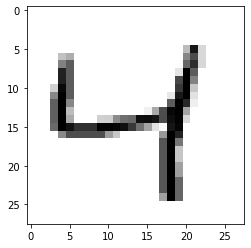

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[2], cmap="gray_r")

In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

y_train = enc.fit_transform(y_train_raw.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test_raw.reshape(-1, 1)).toarray()

In [11]:
model = keras.models.Sequential()
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation=ks.activations.relu))
model.add(ks.layers.Dense(32, activation=ks.activations.sigmoid))
model.add(ks.layers.Dense(10, activation=ks.activations.softmax))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=30, epochs=5)

2021-08-26 17:34:47.130079: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-26 17:34:47.139824: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fb604454ea0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-08-26 17:34:47.139842: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Host, Default Version
2021-08-26 17:34:50.151786: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
2000/2000 [==============================] - 2s 946us/step - loss: 0.7463 - accuracy: 0.7995
Epoch 2/5
2000/2000 [==============================] - 2s 1ms/step - loss: 0.4015 - accuracy: 0.8830
Epoch 3/5
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3680 - accuracy: 0.8908
Epoch 4/5
2000/2000 [==============================] - 2s 953us/step - loss: 0.3250 - accuracy: 0.9050
Epoch 5/5
2000/2000 [==============================] - 2s 977us/step - loss: 0.3148 - accuracy: 0.9076


In [11]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)

print('Test')
print('Loss: %6.6f' % test_loss)
print('Accuracy: %0.4f' % test_acc)

313/313 [==============================] - 0s 616us/step - loss: 0.2900 - accuracy: 0.9182
Test
Loss: 0.289994
Accuracy: 0.9182
